In [39]:
import pandas
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import norm, gaussian_kde
from scipy import interpolate
import numpy.linalg as alg
from numpy.linalg import inv
from scipy.interpolate import CubicSpline
from numpy import polyfit
from scipy.interpolate import interp1d
from pylab import figure, axes, pie, title, show


In [20]:
# We define the Data Generating Function taking L and rho as arguments

n=1000
def DGP(L,rho):

    mean=np.zeros(n)
    cov=np.identity(n)

    V=np.random.uniform(low=-2.0, high=2.0, size=n)
    uchap=np.random.multivariate_normal(mean, cov)


    U = defaultdict(list)
    Y = defaultdict(list)
    for j in range(n):
        U[j]=min(max(-3,rho*uchap[j]),3)
        Y[j]=L*math.exp(-V[j]**2/2)/math.sqrt(2*math.pi)+U[j]

    #We delete outliers
    Yt=[]
    Vt=[]
    for j in range(n):
        if V[j]>-1.8:
            if V[j]<1.8:
                Vt.append(V[j])
                Yt.append(Y[j])
    return (Vt,Yt)



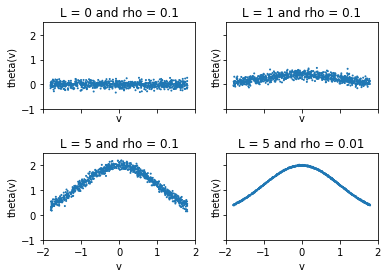

In [69]:
# We apply the DGP function and plot the simulated data

f, axarr = plt.subplots(2, 2,sharex=True, sharey=True)
plt.axis([-2, 2, -1, 2.5])
#f.suptitle('Simulated data', fontsize=14)

s = [1 for n in range(len(Vt))]

L=0
rho=0.1
result=DGP(L,rho)
Vt=result[0]
Yt=result[1]
axarr[0, 0].scatter(Vt, Yt,s)
axarr[0, 0].set_title('L = '+str(L)+' and rho = '+str(rho))
axarr[0, 0].set_xlabel('v')
axarr[0, 0].set_ylabel('theta(v)')

L=1
rho=0.1
result=DGP(L,rho)
Vt=result[0]
Yt=result[1]
axarr[0, 1].scatter(Vt, Yt,s)
axarr[0, 1].set_title('L = '+str(L)+' and rho = '+str(rho))
axarr[0, 1].set_xlabel('v')
axarr[0, 1].set_ylabel('theta(v)')

L=5
rho=0.1
result=DGP(L,rho)
Vt=result[0]
Yt=result[1]
axarr[1, 0].scatter(Vt,Yt,s)
axarr[1, 0].set_title('L = '+str(L)+' and rho = '+str(rho))
axarr[1, 0].set_xlabel('v')
axarr[1, 0].set_ylabel('theta(v)')

L=5
rho=0.01
result=DGP(L,rho)
Vt=result[0]
Yt=result[1]
axarr[1, 1].scatter(Vt,Yt,s)
axarr[1, 1].set_title('L = '+str(L)+' and rho = '+str(rho))
axarr[1, 1].set_xlabel('v')
axarr[1, 1].set_ylabel('theta(v)')

f.subplots_adjust(hspace=0.5)
plt.savefig('Simulated data.jpg')
plt.show()


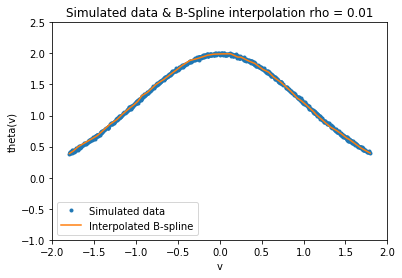

In [84]:
L=5
rho=0.01
result=DGP(L,rho)
Vt=result[0]
Yt=result[1]

# Series estimation with Cubic B splines interpolation
# We need to sort the data according to the value of V


aa=np.column_stack((Vt,Yt))
x=aa[aa[:,0].argsort()][:,0]
y=aa[aa[:,0].argsort()][:,1]

# Cubic B splines interpolation
tck,u = interpolate.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=50,endpoint=True)
out = interpolate.splev(u,tck)

plt.figure()
plt.plot(x, y, '.', out[0], out[1])
plt.xlabel('v')
plt.ylabel('theta(v)')
plt.legend(['Simulated data', 'Interpolated B-spline', 'True'],loc='best')
plt.axis([-2, 2, -1, 2.5])
plt.title('Simulated data & B-Spline interpolation rho = '+str(rho))
plt.savefig('Bspline'+str(rho)+'.jpg')
plt.show()





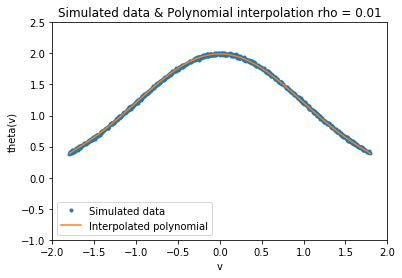

[[ 2.96502095e-07  3.00983340e-08 -1.29507357e-06 -8.41832093e-08
   1.38054907e-06  5.64985413e-08 -2.09269336e-07]
 [ 3.00983340e-08  2.46531224e-07 -1.06349314e-07 -8.80725374e-07
   9.36378865e-08  6.11460243e-07 -8.28963083e-09]
 [-1.29507357e-06 -1.06349314e-07  5.85050687e-06  3.01786991e-07
  -6.56266525e-06 -2.18729389e-07  1.08721359e-06]
 [-8.41832093e-08 -8.80725374e-07  3.01786991e-07  3.30792524e-06
  -2.77740065e-07 -2.49337775e-06  2.05630782e-08]
 [ 1.38054907e-06  9.36378865e-08 -6.56266525e-06 -2.77740065e-07
   8.02484080e-06  2.18426968e-07 -1.59363985e-06]
 [ 5.64985413e-08  6.11460243e-07 -2.18729389e-07 -2.49337775e-06
   2.18426968e-07  2.22069792e-06 -1.23847896e-08]
 [-2.09269336e-07 -8.28963083e-09  1.08721359e-06  2.05630782e-08
  -1.59363985e-06 -1.23847896e-08  5.77686244e-07]]


In [85]:
# Series estimation with polynomial interpolation

xp = np.linspace(-1.8, 1.8, num=500, endpoint=True)

deg2=6
fit, omega = polyfit(x, y,deg=deg2,cov=True)
p = np.poly1d(fit)
plt.plot(x, y, '.', xp, p(xp))
plt.xlabel('v')
plt.ylabel('theta(v)')
plt.axis([-2, 2, -1, 2.5])
plt.legend(['Simulated data', 'Interpolated polynomial', 'True'],loc='best')
plt.title('Simulated data & Polynomial interpolation rho = '+str(rho))
plt.savefig('polynomial'+str(rho)+'.jpg')
plt.show()

print(omega) # Matrice de variance covariance des coefficients estimés

In [32]:

#(1) Set γ ̃n ≡ 1 −
#.1/logn. Simulate a large number R of draws denoted Z1,...,ZR from the K-variate stan-
#dard normal distribution N (0,IK).

gamman=1-0.1/math.log(n)


R=5000 
Z = defaultdict(list)
mean=np.zeros(K)
cov=np.identity(K)
for i in range(R):
    Z[i]=np.random.multivariate_normal(mean, cov)
    
    

In [33]:
#(2) Compute Ω􏰷n, a consistent estimator for the large
#samplevarianceof√n􏰂β􏰷 −β 􏰃. 

#Need to calculate Ω􏰊1/2 (we have to diagonalize first)
A = omega
D, P = np.linalg.eig(A)
D=(np.diag(D))
B=np.dot(np.dot(P,D**(1/2)),inv(P))
#We can verify that B*B=A
#C=alg.matrix_power(B,2)
#print(A-C)
Omegaracine=B


In [34]:
#(3)Foreachv∈V,computeg􏰷(v)=p (v)′Ω􏰷1/2 andset √nn nn
# sn(v) = ∥g􏰷(v)∥/ n.

#We consider that K = order of the polynomial + 1 (constant)
K=deg2+1

Pn= defaultdict(list)
G = defaultdict(list)
S = defaultdict(list)
for vv in x:
    #We compute the vector pn(v) of the K functions at v
    for pp in [6,5,4,3,2,1,0]:
        Pn[vv].append(vv**pp)
    G[vv]=np.dot(Pn[vv],Omegaracine)
    S[vv]=alg.norm(G[vv])/(n**(1/2))
    

knvgamman 3.1216642879683407
1
1


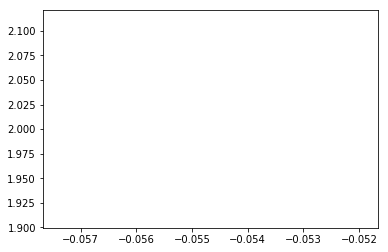

In [35]:
#4) Compute
#k n , V ( γ ̃ n ) = γ ̃ n − q u a n t i l e o f { s u p 􏰀 g􏰷 ( v ) ′ Z r / ∥ g􏰷 ( v ) ∥ 􏰁 , r = 1 , . . . , R } 

amaximiser=defaultdict(list)
maximisé=defaultdict(list)
for r in range(R):
    for vv in x:
        amaximiser[r].append(np.dot(G[vv],Z[r])/alg.norm(G[vv]))
    maximisé[r]=max(amaximiser[r])
quantile=[]
for r in range(R):
    quantile.append(maximisé[r])
knvgamman=np.percentile(quantile,gamman*100)

print('knvgamman',knvgamman)

#, a n d
#v∈V
#V􏰷 n = { v ∈ V : θ􏰷 n ( v ) ≤ m i n 􏰂 θ􏰷 n ( v ) + k n , V ( γ ̃ n ) s n ( v ) 􏰃 + 2 k n , V ( γ ̃ n ) s n ( v ) } ,
amaximiser=[]
for i in range(len(x)):
    vv=x[i]
    yv=y[i]
    amaximiser.append(yv-knvgamman*S[vv])
pourcomparer=max(amaximiser)


#On reestime le set:
xestimate=[]
yestimate=[]
for i in range(len(x)):
    vv=x[i]
    yv=y[i]
    valeur=pourcomparer-2*knvgamman*S[vv]
    if yv >= valeur:
        xestimate.append(vv)
        yestimate.append(yv)
print(len(xestimate))
print(len(yestimate))



# Problem because of polynomial innterpolation : we will not estimate the set. 

In [37]:
aa=np.column_stack((Vt,Yt))
x=aa[aa[:,0].argsort()][:,0]
y=aa[aa[:,0].argsort()][:,1]

# 5) Compute kn,V􏰷n (p)=p−quantileof 􏰲sup􏰀g􏰷(v)′Zr/∥g􏰷(v)∥􏰁,r=1,...,R􏰳,andset

p=0.9
amaximiser=defaultdict(list)
maximisé=defaultdict(list)
for r in range(R):
    for vv in x:
        amaximiser[r].append(np.dot(G[vv],Z[r])/alg.norm(G[vv]))
    maximisé[r]=max(amaximiser[r])
quantile=[]
for r in range(R):
    quantile.append(maximisé[r])
kp=np.percentile(quantile,p*100)

print('kp',kp)

amaximiser=[]
s=0.01
for i in range(len(x)):
    vv=x[i]
    yv=y[i]
    amaximiser.append(yv-kp*alg.norm(G[vv])/(n**(1/2)))
thetachapP=max(amaximiser)
print('upper bound corrigé', thetachapP)





kp 2.4429194939316363
upper bound corrigé 2.0101704432824756


kp 2.418707757131815


upper bound corrigé 2.0116925296284567
